### In this notebook we analyze some of the data gathered in the BFS notebook file

## Part A:

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql

import timeit

In [38]:
analysis = pd.read_csv('permutations.csv')

First we read in our saved data from the BFS on Wikipedia Graph notebook. Following we can begin to find some interesting metrics that give us an idea of how our graph is connected.

In [3]:

analysis.head()

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
0,"(34298991, 45522031)",Geological_history_of_Mars,Always_Near_-_A_Romantic_Collection,1,"[[34298991, 20257, 8786, 235828, 4014281, 4552...",6,"[34298991, 20257, 8786, 235828, 4014281, 45522...",0.247299
1,"(34298991, 54435140)",Geological_history_of_Mars,St_Faith\'s_and_Aylsham_Rural_District,1,"[[34298991, 26298, 349345, 449143, 54435140]]",5,"[34298991, 26298, 349345, 449143, 54435140]",0.337016
2,"(34298991, 40983657)",Geological_history_of_Mars,Kojur_Industrial_Estate,5,"[[34298991, 21857752, 19653787, 2524494, 40983...",5,"[34298991, 21857752, 19653787, 2524494, 40983657]",0.214846
3,"(34298991, 45522031)",Geological_history_of_Mars,Always_Near_-_A_Romantic_Collection,1,"[[34298991, 20257, 8786, 235828, 4014281, 4552...",6,"[34298991, 20257, 8786, 235828, 4014281, 45522...",0.262307
4,"(34298991, 54435140)",Geological_history_of_Mars,St_Faith\'s_and_Aylsham_Rural_District,1,"[[34298991, 26298, 349345, 449143, 54435140]]",5,"[34298991, 26298, 349345, 449143, 54435140]",0.344064


<b> Lengths of Shortest Paths:

Mean and Standard Deviation

In [4]:
analysis['Shortest Path Length'].mean()

4.9528175291156105

In [5]:
analysis['Shortest Path Length'].std()

1.6194481077525276

Combinations of Max and Min

In [6]:
maxi = analysis['Shortest Path Length'].max()
ans = analysis.loc[analysis['Shortest Path Length']==maxi]
ans.head()

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
1346,"(28191801, 15087124)","Entäs_nyt,_Niskavuori?",Greenleaf_Township,644,"[[28191801, 8439, 11887, 4689264, 3517460, 111...",9,"[28191801, 8439, 11887, 4689264, 3517460, 1116...",1.119453
3538,"(1511826, 52514696)",Blind_Shaft,Stenoparmena_nigra,1482,"[[1511826, 5751, 100640, 2579000, 204182, 4507...",9,"[1511826, 5751, 100640, 2579000, 204182, 45079...",2.862116
7686,"(49109470, 52514696)",Mohamed_Ayech,Stenoparmena_nigra,591,"[[49109470, 30188, 358, 49871, 518913, 1186631...",9,"[49109470, 30188, 358, 49871, 518913, 11866314...",1.828297
8962,"(471568, 52514696)",USWA,Stenoparmena_nigra,127,"[[471568, 1130008, 689, 159283, 45022184, 1186...",9,"[471568, 1130008, 689, 159283, 45022184, 11866...",0.466908
15382,"(237214, 15087124)",AspectJ,Greenleaf_Township,652,"[[237214, 10635, 118450, 27318, 1769262, 11169...",9,"[237214, 10635, 118450, 27318, 1769262, 111695...",0.837989


In [7]:
len(ans)

74

In [8]:
mini = analysis['Shortest Path Length'].min()
analysis.loc[analysis['Shortest Path Length']==mini]

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
9,"(34298991, 28191801)",Geological_history_of_Mars,"Entäs_nyt,_Niskavuori?",0,[],0,[],0.001773
16,"(34298991, 28191801)",Geological_history_of_Mars,"Entäs_nyt,_Niskavuori?",0,[],0,[],0.000655
40,"(34298991, 471568)",Geological_history_of_Mars,USWA,0,[],0,[],0.001082
61,"(34298991, 16224284)",Geological_history_of_Mars,"Saiye,_Ghana",0,[],0,[],0.001663
80,"(34298991, 5789258)",Geological_history_of_Mars,Benzonia,0,[],0,[],0.000876
...,...,...,...,...,...,...,...,...
102040,"(32540089, 36572955)",Terreplein,Geoffrey_Plitt,0,[],0,[],0.000576
102041,"(32540089, 40161542)",Terreplein,Doruhan,0,[],0,[],0.000522
102047,"(32540089, 28589339)",Terreplein,Maria_Carrillo,0,[],0,[],0.000542
102066,"(32540089, 35302964)",Terreplein,Mir_Khavand,0,[],0,[],0.000588


[]

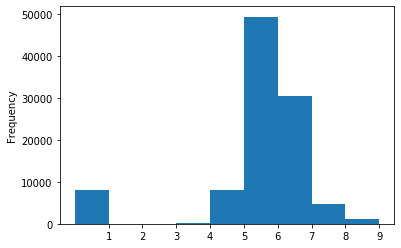

In [14]:
ax = analysis['Shortest Path Length'].plot.hist( alpha=1, bins=9)
ax.set_xticks([1,2,3,4,5,6,7,8,9])

ax.plot()

<b> Amounts of Time Taken:

Mean

In [15]:
analysis['Time Taken'].mean()

0.4673503090241208

Max and Min

In [16]:
maxi = analysis['Time Taken'].max()
analysis.loc[analysis['Time Taken']==maxi]

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
66664,"(53125642, 58867760)",Missing_(2016_film),2008_Women\'s_Australian_Hockey_League,152,"[[53125642, 16756, 11884, 1148, 4501639, 58867...",6,"[53125642, 16756, 11884, 1148, 4501639, 58867760]",17.885316


In [19]:
mini = analysis['Time Taken'].min()
analysis.loc[analysis['Time Taken']==mini]


,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
85694,"(44633696, 37008297)",Frank_Sebaratnam,Velupillai,0,[],0,[],0.000483


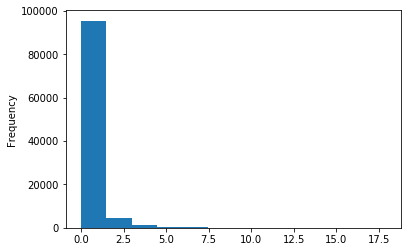

In [12]:
ax = analysis['Time Taken'].plot.hist(bins=12, alpha=1)


Total Time Taken

In [13]:
analysis['Time Taken'].sum()/60/60

13.253665305333211

This data set took 13 hours to generate! This was only finding permutations of 350 data points. While we know these 350 points indepth, we can only assume the rest of the wikipedia graph behaves in the same way.

<b> Number of Paths Found

Mean

In [34]:
analysis['Paths Found'].mean()

121.07728399173287

Combinations with Max and Min

In [39]:
maxi = analysis['Paths Found'].max()
analysis.loc[analysis['Paths Found']==maxi]

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
91404,"(14457829, 57833267)",Succinyl-CoA_hydrolase,Kwon_Oh-hee,10984,"[[14457829, 1645089, 25, 31717, 592311, 119003...",7,"[14457829, 1645089, 25, 31717, 592311, 1190037...",11.423608


In [16]:
mini = analysis['Paths Found'].min()
analysis.loc[analysis['Paths Found']==mini]

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
9,"(34298991, 28191801)",Geological_history_of_Mars,"Entäs_nyt,_Niskavuori?",0,[],0,[],0.001773
16,"(34298991, 28191801)",Geological_history_of_Mars,"Entäs_nyt,_Niskavuori?",0,[],0,[],0.000655
40,"(34298991, 471568)",Geological_history_of_Mars,USWA,0,[],0,[],0.001082
61,"(34298991, 16224284)",Geological_history_of_Mars,"Saiye,_Ghana",0,[],0,[],0.001663
80,"(34298991, 5789258)",Geological_history_of_Mars,Benzonia,0,[],0,[],0.000876
...,...,...,...,...,...,...,...,...
102040,"(32540089, 36572955)",Terreplein,Geoffrey_Plitt,0,[],0,[],0.000576
102041,"(32540089, 40161542)",Terreplein,Doruhan,0,[],0,[],0.000522
102047,"(32540089, 28589339)",Terreplein,Maria_Carrillo,0,[],0,[],0.000542
102066,"(32540089, 35302964)",Terreplein,Mir_Khavand,0,[],0,[],0.000588


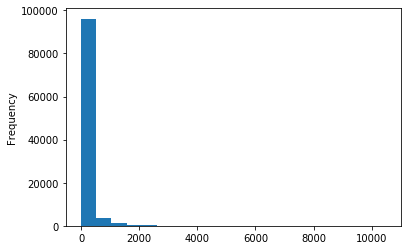

In [33]:
ax = analysis['Paths Found'].plot.hist(bins=20, alpha=1)

Let us consider that a short path between two articles in one direction does not mean a short path in the return direction. Below we show an example of this.

(237214, 15087124)	AspectJ	Greenleaf_Township	

In [18]:
new1 = analysis[(analysis['Start Title']=='AspectJ') & (analysis['Goal Title']=='Greenleaf_Township')]
new2 = analysis[(analysis['Start Title']=='Greenleaf_Township') & (analysis['Goal Title']=='AspectJ')]

In [19]:
new1

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
15382,"(237214, 15087124)",AspectJ,Greenleaf_Township,652,"[[237214, 10635, 118450, 27318, 1769262, 11169...",9,"[237214, 10635, 118450, 27318, 1769262, 111695...",0.837989


In [20]:
new2

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
18563,"(15087124, 237214)",Greenleaf_Township,AspectJ,318,"[[15087124, 91817, 2709, 6698, 34154, 237214],...",6,"[15087124, 91817, 2709, 6698, 34154, 237214]",0.69792


## Part B:

Let us also consider our alternate  data. We perform similar analysis to see if we get similar results. An obvious flaw is that it is difficult to consider every article using these methods. However, if we find similar results across multiple article groupings, we can comfortably assume the graph as a whole is similar.

When generating this dataset we used 1000 articles and each article was used as a destination and beginning once. This is less in depth compared to using permutations, but we get access to more unique articles.

In [42]:
analysis = pd.read_csv('randompairs.csv')

In [43]:
analysis.head()

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
0,"[51385595, 20321524]",Ladbrooke_School,Favianna_Rodriguez,6,"[[51385595, 1135131, 31056, 525428, 20321524],...",5,"[51385595, 1135131, 31056, 525428, 20321524]",0.305049
1,"[20321524, 52692366]",Favianna_Rodriguez,Miltogramma_punctata,9,"[[20321524, 18987, 775859, 12206720, 48703134,...",6,"[20321524, 18987, 775859, 12206720, 48703134, ...",0.216768
2,"[52692366, 21260623]",Miltogramma_punctata,Ministry_of_National_Defense_(Liberia),1041,"[[52692366, 9239, 10156432, 1516996, 1500005, ...",6,"[52692366, 9239, 10156432, 1516996, 1500005, 2...",0.735166
3,"[21260623, 587847]",Ministry_of_National_Defense_(Liberia),Amaral\'s_Brazilian_gecko,9,"[[21260623, 17791, 20611195, 323702, 587847], ...",5,"[21260623, 17791, 20611195, 323702, 587847]",0.044975
4,"[587847, 2147446]",Amaral\'s_Brazilian_gecko,Division_of_Northern_Territory,5,"[[587847, 3383, 4689264, 984203, 2147446], [58...",5,"[587847, 3383, 4689264, 984203, 2147446]",0.668001


<b> Lengths of Shortest Paths:

Mean

In [44]:
analysis['Shortest Path Length'].mean()

5.126

Random Pairs Max and Min

In [45]:
maxi = analysis['Shortest Path Length'].max()
ans = analysis.loc[analysis['Shortest Path Length']==mini]
ans.head()

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
114,"[4689107, 39741984]",Fort_McPherson_National_Cemetery,Harpalus_indigens,1822,"[[4689107, 29810, 10418624, 14208, 890203, 385...",9,"[4689107, 29810, 10418624, 14208, 890203, 3858...",4.525727


In [41]:
len(ans)

74

In [26]:
mini = analysis['Shortest Path Length'].min()
analysis.loc[analysis['Shortest Path Length']==mini]

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
13,"[517095, 34234410]",Reduced-gravity_aircraft,Siha_Mashariki,0,[],0,[],0.000863
50,"[15178198, 60307883]",Istishhad,Christ_Is_Risen!_Christ_Is_Risen!,0,[],0,[],0.000867
65,"[7185151, 35943315]",Powered_roller_coaster,McCatty,0,[],0,[],0.000827
82,"[19986355, 37576611]",Zuan_Francesco_Venier,Irish_heath,0,[],0,[],0.001000
126,"[21494511, 62032496]",Olympic-Wallowa_Lineament,List_of_Za_sklom_(TV_series)_episodes,0,[],0,[],0.001468
137,"[43317723, 20358901]",Sebastián_Salem,Tigerville,0,[],0,[],0.000939
145,"[11055223, 41285185]",Soleto_Map,Darreh_Panbehdan,0,[],0,[],0.001066
149,"[19589870, 24021338]","Bilbarin,_Western_Australia","Shumbi,_Papua_New_Guinea",0,[],0,[],0.000874
153,"[60888293, 742593]",Waiheke_Local_Board,Guyuk,0,[],0,[],0.000870
170,"[4961443, 13972839]",List_of_rasa\'il_in_the_Encyclopedia_of_the_Br...,Macroglossinae,0,[],0,[],0.000759


[]

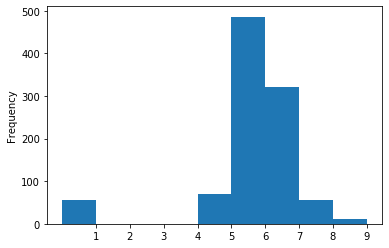

In [27]:
ax = analysis['Shortest Path Length'].plot.hist( alpha=1, bins=9)
ax.set_xticks([1,2,3,4,5,6,7,8,9])
ax.plot()

<b> Amounts of Time Taken:

In [28]:
analysis['Time Taken'].mean()

0.6003973361000171

Max and Min

In [29]:
maxi = analysis['Time Taken'].max()
analysis.loc[analysis['Time Taken']==maxi]

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
978,"[19072913, 6144714]",List_of_Top_25_albums_for_1970_in_Australia,Philadelphia_Freedoms,1243,"[[19072913, 16095, 11388236, 23338, 6144714], ...",5,"[19072913, 16095, 11388236, 23338, 6144714]",18.940672


In [30]:
mini = analysis['Time Taken'].min()
analysis.loc[analysis['Time Taken']==mini]

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
281,"[4378601, 24510484]",Cutthroat_eel,Freshwater_smelt,0,[],0,[],0.000536


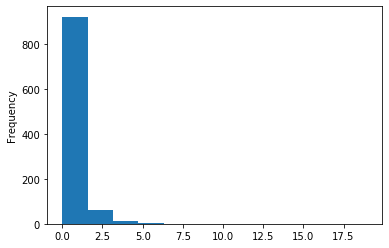

In [31]:
ax = analysis['Time Taken'].plot.hist(bins=12, alpha=1)


In [32]:
analysis['Time Taken'].sum()/60

10.006622268333619

It took us 10 minutes to generate all the data.

<b> Number of Paths Found

Mean

In [33]:
analysis['Paths Found'].mean()

129.007

Random pairs with Max and Min

In [34]:
maxi = analysis['Paths Found'].max()
analysis.loc[analysis['Paths Found']==maxi]

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
402,"[35633282, 7797146]",Ingestive_behaviors,USS_Witek_(DD-848),2915,"[[35633282, 13980, 39, 22153, 194856, 7797146]...",6,"[35633282, 13980, 39, 22153, 194856, 7797146]",3.316532


Interestingly, we find many paths are impossible to complete. Perhaps we are seeing many pages with no in-links.

In [35]:
mini = analysis['Paths Found'].min()
analysis.loc[analysis['Paths Found']==mini]

,Combination,Start Title,Goal Title,Paths Found,All Paths,Shortest Path Length,Shortest Path,Time Taken
13,"[517095, 34234410]",Reduced-gravity_aircraft,Siha_Mashariki,0,[],0,[],0.000863
50,"[15178198, 60307883]",Istishhad,Christ_Is_Risen!_Christ_Is_Risen!,0,[],0,[],0.000867
65,"[7185151, 35943315]",Powered_roller_coaster,McCatty,0,[],0,[],0.000827
82,"[19986355, 37576611]",Zuan_Francesco_Venier,Irish_heath,0,[],0,[],0.001000
126,"[21494511, 62032496]",Olympic-Wallowa_Lineament,List_of_Za_sklom_(TV_series)_episodes,0,[],0,[],0.001468
137,"[43317723, 20358901]",Sebastián_Salem,Tigerville,0,[],0,[],0.000939
145,"[11055223, 41285185]",Soleto_Map,Darreh_Panbehdan,0,[],0,[],0.001066
149,"[19589870, 24021338]","Bilbarin,_Western_Australia","Shumbi,_Papua_New_Guinea",0,[],0,[],0.000874
153,"[60888293, 742593]",Waiheke_Local_Board,Guyuk,0,[],0,[],0.000870
170,"[4961443, 13972839]",List_of_rasa\'il_in_the_Encyclopedia_of_the_Br...,Macroglossinae,0,[],0,[],0.000759


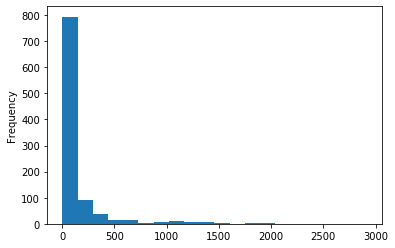

In [36]:
ax = analysis['Paths Found'].plot.hist(bins=20, alpha=1)